<a href="https://colab.research.google.com/github/gundaminpde/2022/blob/main/CNN_Kaggle_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
###어린이와 어른의 사진을 구분하는 분류 모델을 CNN으로 학습함 

### 앞의 것과 다르게 kaggle에서 직접 자료를 받아 사용하였음.

### 자료는 https://www.kaggle.com/datasets/die9origephit/children-vs-adults-images?select=train 에서 받았음.

from google.colab import drive 
drive.mount('/content/drive/') 

#from google.colab import files # 데이터 불러오기
#file_uploaded=files.upload()   

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [23]:
pwd

'/content'

In [8]:
ls

MyDrive/


In [11]:
cd MyDrive

/content/drive/MyDrive


In [12]:
cd /content/drive/MyDrive/data

/content/drive/MyDrive/data


In [14]:
train_dir = "children_Adults.zip"
!unzip children_Adults.zip               #압축 풀기

Archive:  children_Adults.zip
  inflating: test/adults/0.jpg       
  inflating: test/adults/1.jpg       
  inflating: test/adults/10.jpg      
  inflating: test/adults/11.jpg      
  inflating: test/adults/12.jpg      
  inflating: test/adults/13.jpg      
  inflating: test/adults/14.jpg      
  inflating: test/adults/15.jpg      
  inflating: test/adults/16.jpg      
  inflating: test/adults/17.jpg      
  inflating: test/adults/18.jpg      
  inflating: test/adults/19.jpg      
  inflating: test/adults/2.jpg       
  inflating: test/adults/20.jpg      
  inflating: test/adults/21.jpg      
  inflating: test/adults/22.jpg      
  inflating: test/adults/23.jpg      
  inflating: test/adults/24.jpg      
  inflating: test/adults/25.jpg      
  inflating: test/adults/26.jpg      
  inflating: test/adults/27.jpg      
  inflating: test/adults/28.jpg      
  inflating: test/adults/29.jpg      
  inflating: test/adults/3.jpg       
  inflating: test/adults/30.jpg      
  inflating: test/ad

Text(0.5, 1.0, 'Baby')

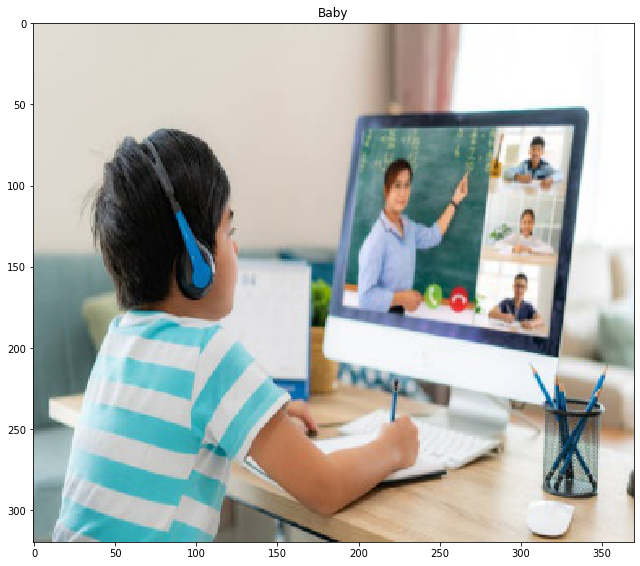

In [17]:
import numpy as np
from skimage.color import rgb2lab, rgb2gray, lab2rgb
from skimage.io import imread, imshow
import matplotlib.pyplot as plt

image_sample= imread('train/children/60.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample, ax=ax)
ax.set_title('Baby')
#ax.axis('off');

Text(0.5, 1.0, 'Adult')

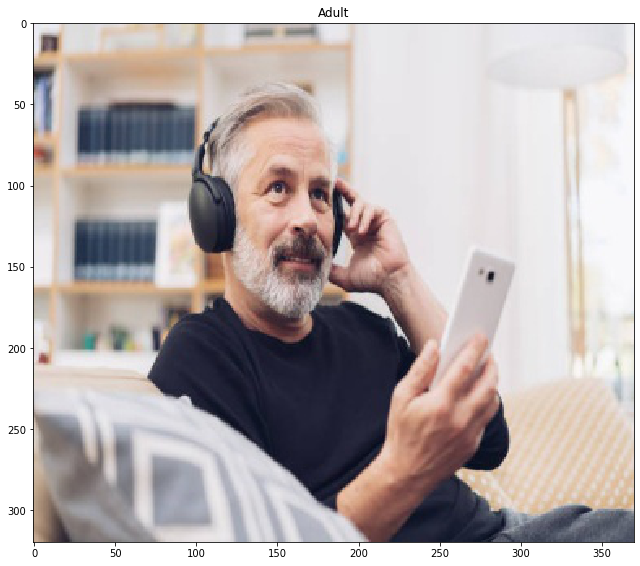

In [19]:
image_sample2= imread('train/adults/390.jpg')
fig, ax = plt.subplots(figsize=(9, 16))
imshow(image_sample2, ax=ax)
ax.set_title('Adult')

In [21]:
image_sample2.shape

(320, 370, 3)

In [7]:
ls

drive/  sample_data/


In [11]:
# ImageDataGenerator의 flow_from_directory를 사용하여 directory로 데이터를 입력

from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras.optimizers import Adam

train_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환
        rotation_range=40,      # 40도까지 회전
        width_shift_range=0.2,  # 20%까지 좌우 이동
        height_shift_range=0.2, # 20%까지 상하 이동
        shear_range=0.2,        # 20%까지 기울임
        zoom_range=0.2,         # 20%까지 확대
        horizontal_flip=True,   # 좌우 뒤집기
    )

train = train_gen.flow_from_directory(directory='../content/drive/MyDrive/data/train',
                                              target_size=(320, 370),  # 사용할 CNN 모델 입력 사이즈에 맞게 resize
                                              color_mode='rgb',       # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
                                              class_mode='categorical', #class_mode='binary',
                                              batch_size=20,
                                              shuffle=True)


# 컨볼루션 신경망의 설정
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(320, 370, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(128,  activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(2, activation='softmax'))

# 모델의 실행 옵션을 설정합니다.
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])


history = model.fit_generator(train, epochs=5 )




Found 680 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:44: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/5
34/34 [==============================] - 407s 12s/step - loss: 29.2914 - accuracy: 0.4676
Epoch 2/5
34/34 [==============================] - 403s 12s/step - loss: 0.6934 - accuracy: 0.5162
Epoch 3/5
34/34 [==============================] - 393s 12s/step - loss: 0.6854 - accuracy: 0.5632
Epoch 4/5
34/34 [==============================] - 423s 12s/step - loss: 0.6948 - accuracy: 0.5324
Epoch 5/5
34/34 [==============================] - 405s 12s/step - loss: 0.6874 - accuracy: 0.5662
